In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

from sklearn.cluster import KMeans
from collections import Counter
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from IPython.display import Image


In [ ]:
data_path  ='data/'
dfs = []

for f in os.listdir('data'):
    dfs.append(pd.read_csv(data_path+f))
    print(data_path+f)

len(dfs)


data/uber-raw-data-jul14.csv
data/uber-raw-data-may14.csv
data/uber-raw-data-apr14.csv
data/uber-raw-data-aug14.csv
data/uber-raw-data-jun14.csv
data/uber-raw-data-sep14.csv


6

In [ ]:
dataset = pd.concat(dfs) #CONCATENA LOS ARCHIVOS
dataset.info(verbose = True , null_counts = True)

<ipython-input-3-6567a9b343fc>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  dataset.info(verbose = True , null_counts = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  4534327 non-null  object 
 1   Lat        4534327 non-null  float64
 2   Lon        4534327 non-null  float64
 3   Base       4534327 non-null  object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [ ]:
dataset.count()

Date/Time    4534327
Lat          4534327
Lon          4534327
Base         4534327
dtype: int64

In [ ]:
dataset.columns = ['date_time','lat','lon','tipo'] #Cambio de nombre en las columnas

In [ ]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'], format="%m/%d/%Y %H:%M:%S") #Convierte en Formato Fecha
dataset['numero_semana'] = dataset['date_time'].dt.dayofweek #Obtiene Número de la Semana
dataset['nombre_dia'] = dataset['date_time'].dt.day_name() #Obtiene el Nombre del día
dataset['numero_dia'] = dataset['date_time'].dt.day #Obtiene el Número del día
dataset['hora'] = dataset['date_time'].dt.hour #Obtiene la hora del día
dataset['mes'] = dataset['date_time'].dt.month #Obtiene el mes



In [ ]:
dataset.info(verbose=True,null_counts=True)

<ipython-input-7-dee595d616a7>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dataset.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date_time      4534327 non-null  datetime64[ns]
 1   lat            4534327 non-null  float64       
 2   lon            4534327 non-null  float64       
 3   tipo           4534327 non-null  object        
 4   numero_semana  4534327 non-null  int64         
 5   nombre_dia     4534327 non-null  object        
 6   numero_dia     4534327 non-null  int64         
 7   hora           4534327 non-null  int64         
 8   mes            4534327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 345.9+ MB


In [ ]:
base = dataset.groupby(['tipo','mes'])['date_time'].count().reset_index()
base

,tipo,mes,date_time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


Text(0.5, 1.0, 'VIAJES MENSUALES')

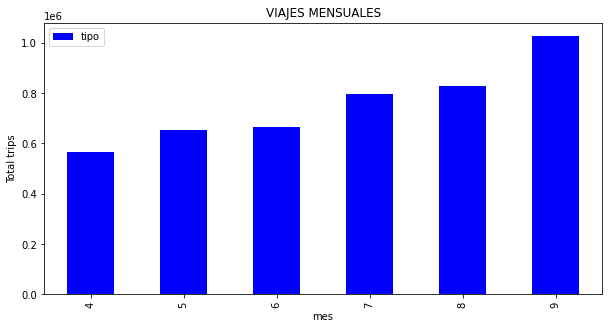

In [ ]:
pickup_hour = dataset.pivot_table(index=['mes'], #NOMBRE DE COLUMNA DE HORA
                                  values='tipo', #OBTIENE LA COLUMNA BASE
                                  aggfunc='count') # Y HACE UN CONTEO?
pickup_hour.plot(kind='bar', figsize=(10,5), color= "blue") #HACE UN GRAFICO TIPO BARRAS

plt.ylabel('Total trips') #NOMBRA EJE DE LAS Y
plt.title('VIAJES MENSUALES')

Text(0.5, 1.0, 'Comportamiento Mensual Por Tipo')

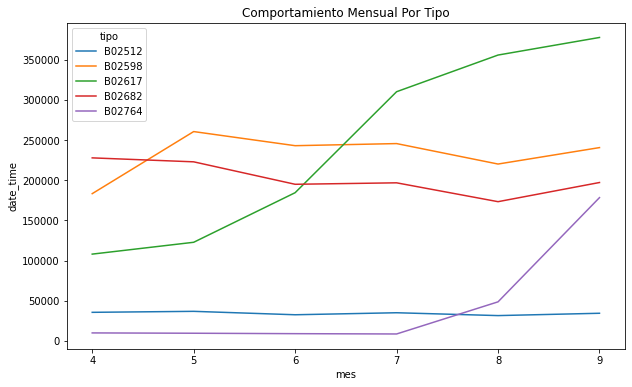

In [ ]:
base = dataset.groupby(['tipo','mes'])['date_time'].count().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='mes',y='date_time', hue='tipo',data=base)
ax.set_title('Comportamiento Mensual Por Tipo')


Text(0.5, 1.0, 'VIAJES POR DIA')

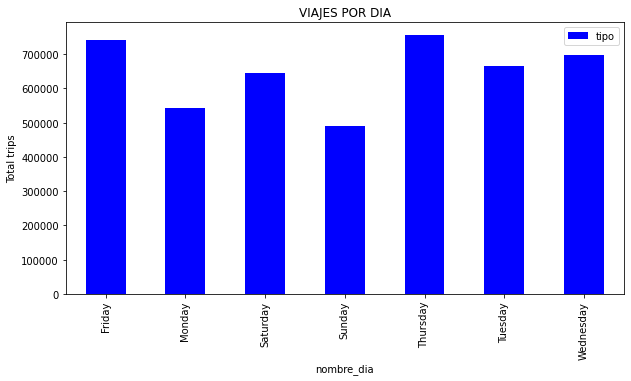

In [ ]:
pickup_hour = dataset.pivot_table(index=['nombre_dia'], #NOMBRE DE COLUMNA DE HORA
                                  values='tipo', #OBTIENE LA COLUMNA BASE
                                  aggfunc='count') # Y HACE UN CONTEO?
pickup_hour.plot(kind='bar', figsize=(10,5), color= "blue") #HACE UN GRAFICO TIPO BARRAS

plt.ylabel('Total trips') #NOMBRA EJE DE LAS Y
plt.title('VIAJES POR DIA') #TITULO DEL GRAFICO

Text(0.5, 1.0, 'Viajes Totales Por Hora')

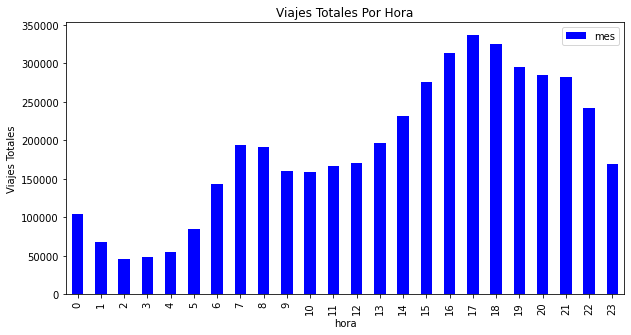

In [ ]:
pickup_hour = dataset.pivot_table(index=['hora'], #NOMBRE DE COLUMNA DE HORA
                                  values='mes', #OBTIENE LA COLUMNA BASE
                                  aggfunc='count') # Y HACE UN CONTEO?
pickup_hour.plot(kind='bar', figsize=(10,5), color= "blue") #HACE UN GRAFICO TIPO BARRAS

plt.ylabel('Viajes Totales') #NOMBRA EJE DE LAS Y
plt.title('Viajes Totales Por Hora') #TITULO DEL GRAFICO

Text(0.5, 1.0, 'Comportamiento Horario Por Tipo')

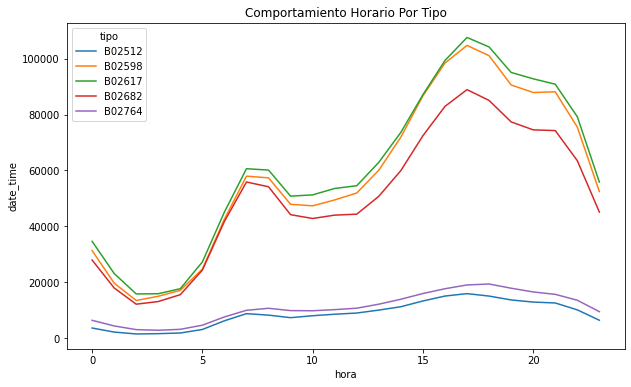

In [ ]:
base = dataset.groupby(['tipo','hora'])['date_time'].count().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='hora',y='date_time', hue='tipo',data=base)
ax.set_title('Comportamiento Horario Por Tipo')

Text(0.5, 1.0, 'Pickups by Week')

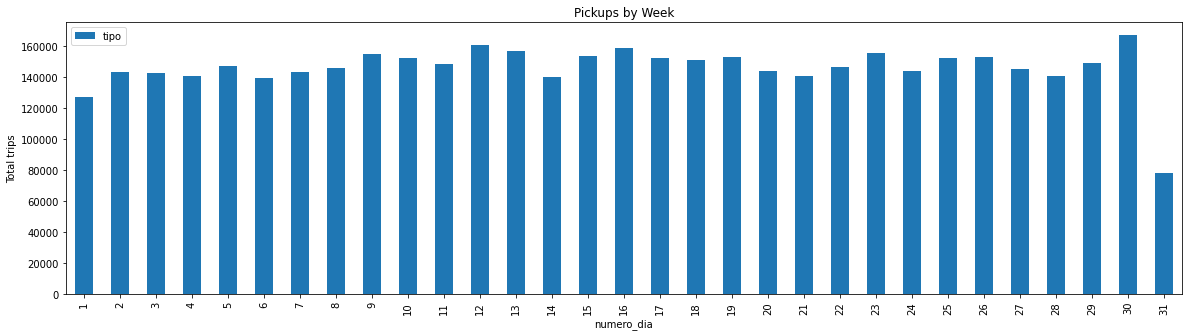

In [ ]:
pickup_hour = dataset.pivot_table(index=['numero_dia'], #NOMBRE DE COLUMNA DE HORA
                                  values='tipo', #OBTIENE LA COLUMNA BASE
                                  aggfunc='count') # Y HACE UN CONTEO?
pickup_hour.plot(kind='bar', figsize=(20,5)) #HACE UN GRAFICO TIPO BARRAS

plt.ylabel('Total trips') #NOMBRA EJE DE LAS Y
plt.title('Pickups by Week') #TITULO DEL GRAFICO

In [ ]:
h_dataset  = pd.DataFrame()
h_dataset['pickups'] = dataset.date_time.value_counts().resample('H').agg('sum')
h_dataset['log'] = np.log(h_dataset.pickups)
h_dataset['pickups_diff'] = h_dataset['pickups'].diff()
h_dataset['log_diff'] = h_dataset['log'].diff()
h_dataset.head(5)

,pickups,log,pickups_diff,log_diff
2014-04-01 00:00:00,138,4.927254,NaN,NaN
2014-04-01 01:00:00,66,4.189655,-72.0,-0.737599
2014-04-01 02:00:00,53,3.970292,-13.0,-0.219363
2014-04-01 03:00:00,93,4.532599,40.0,0.562308
2014-04-01 04:00:00,166,5.111988,73.0,0.579388


In [ ]:
h_dataset.to_csv('h_dataset.csv',sep=';') #GUARDA EL DATASET

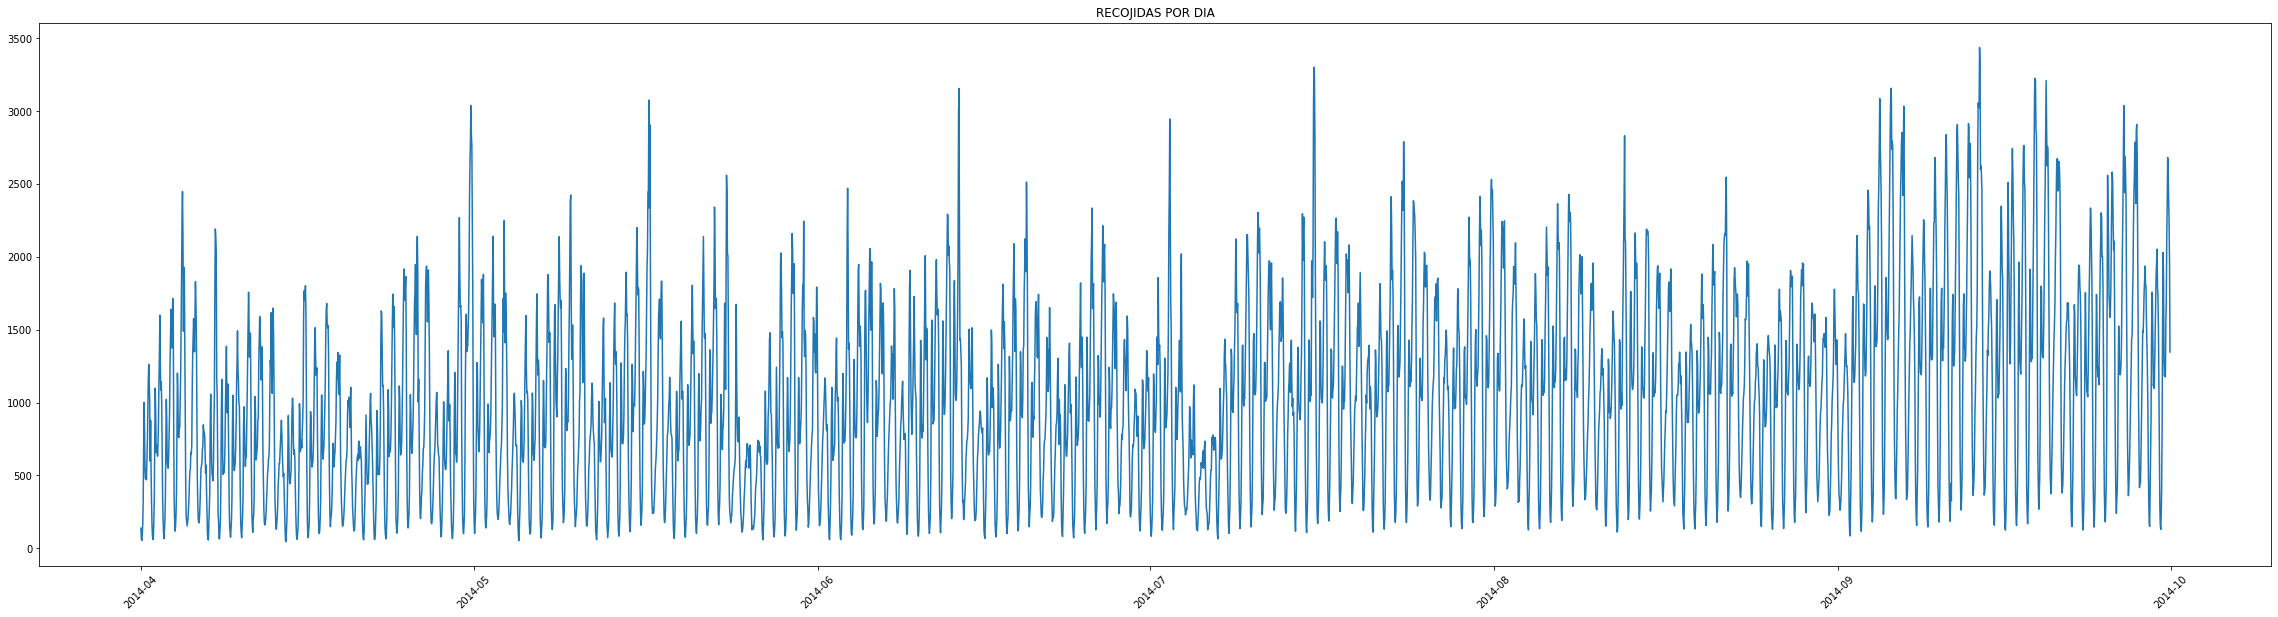

In [ ]:
f, ax = plt.subplots(1,1,figsize=(40,10)) #CREA EL ESPACIO PARA EL GRAFICO
ax.plot(h_dataset['pickups'])

ax.set_title('RECOJIDAS POR DIA') #AGREGA EL TITULO
ax.tick_params(axis = 'x', rotation = 45) #ELIGE EL EJE X / Y OTRO PARAMETRO

plt.show()
plt.close()

In [ ]:
dataset.head(3)

,date_time,lat,lon,tipo,numero_semana,nombre_dia,numero_dia,hora,mes
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,3,Thursday,1,0,5
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,3,Thursday,1,0,5
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,3,Thursday,1,0,5


In [ ]:
def count_rows(rows):
  return len(rows)
by_cross = dataset.groupby(['nombre_dia','hora']).apply(count_rows)
by_cross

nombre_dia  hora
Friday      0       13716
            1        8163
            2        5350
            3        6930
            4        8806
                    ...  
Wednesday   19      47017
            20      47772
            21      44553
            22      32868
            23      18146
Length: 168, dtype: int64

In [ ]:
pivot=by_cross.unstack()
pivot

hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
nombre_dia,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


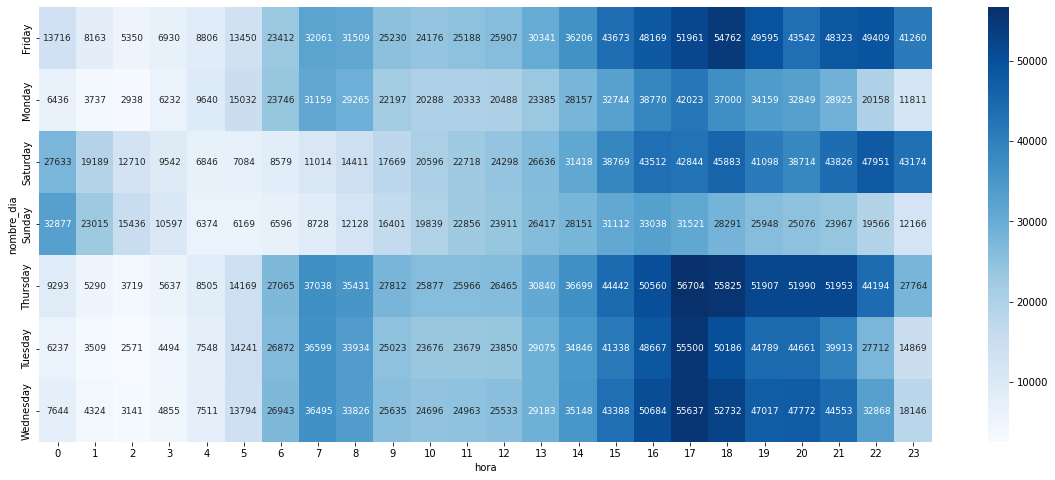

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(pivot,cmap="Blues", annot = True, fmt ="d", linecolor ="white",annot_kws = {"size":9})


In [ ]:
def count_rows2(rows):
  return len(rows)
by_cross = dataset.groupby(['tipo','nombre_dia']).apply(count_rows)
by_cross

tipo    nombre_dia
B02512  Friday         33319
        Monday         25460
        Saturday       26773
        Sunday         20490
        Thursday       35032
        Tuesday        31670
        Wednesday      32929
B02598  Friday        229908
        Monday        163542
        Saturday      198832
        Sunday        146652
        Thursday      235157
        Tuesday       202378
        Wednesday     216644
B02617  Friday        234379
        Monday        176416
        Saturday      206554
        Sunday        164452
        Thursday      240216
        Tuesday       214167
        Wednesday     222669
B02682  Friday        201594
        Monday        143372
        Saturday      170160
        Sunday        126511
        Thursday      205091
        Tuesday       176198
        Wednesday     189863
B02764  Friday         41939
        Monday         32682
        Saturday       43795
        Sunday         32075
        Thursday       39649
        Tuesday        3

In [ ]:
pivot2=by_cross.unstack()
pivot2

nombre_dia,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
tipo,,,,,,,
B02512,33319,25460,26773,20490,35032,31670,32929
B02598,229908,163542,198832,146652,235157,202378,216644
B02617,234379,176416,206554,164452,240216,214167,222669
B02682,201594,143372,170160,126511,205091,176198,189863
B02764,41939,32682,43795,32075,39649,39376,34383


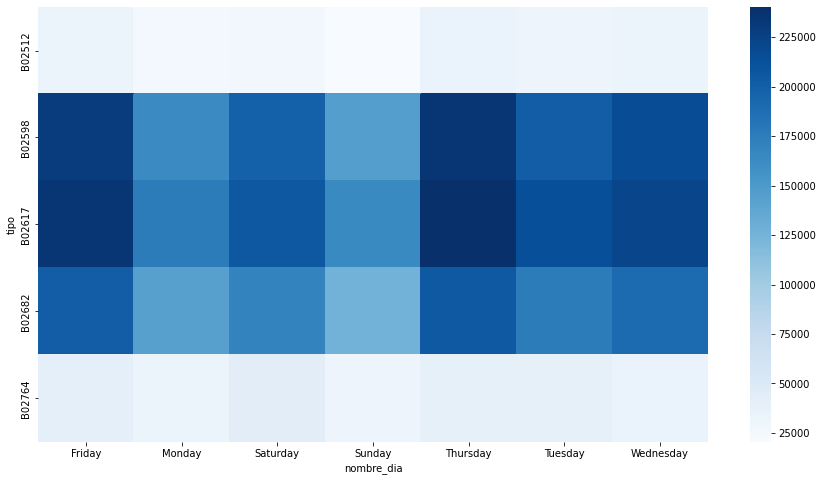

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(pivot2,cmap="Blues")

In [ ]:
plt.figure(figsize=(30,30))
sns.scatterplot(data=dataset,y='lon',x='lat',alpha=0.4)
plt.ylim(-75,-72.5)
plt.xlim(40.0,41.2)

(40.0, 41.2)

In [ ]:
from folium.plugins import HeatMap
import folium

def plot(base1):
    df_out = dataset[dataset['tipo']==base1]
    rush = df_out.groupby(['lat','lon'])['tipo'].count().reset_index()
    basemap = folium.Map()
    HeatMap(rush,zoom=20,radius=15).add_to(basemap)
    return basemap

In [ ]:
h_dataset  = pd.DataFrame()
h_dataset['pickups'] = dataset.date_time.value_counts().resample('h').agg('sum') #AGRUPA LOS VALORES POR HORA Y LOS CUENTA ( PODRIA SER SUMAR) (O PODRIAMOS AGRUPAR POR DIA H VS D)
h_dataset['log'] = np.log(h_dataset.pickups) #OBTIENE EL LOGARITMO DE CADA VALOR // PORQUE UTILIZO LOGARITMO
h_dataset['pickups_diff'] = h_dataset['pickups'].diff() #DIFERENCA ENTRE UN VALOR Y OTRO AUMENTO O DECREMETO
h_dataset['log_diff'] = h_dataset['log'].diff()#DIFERENCA ENTRE UN VALOR Y OTRO AUMENTO O DECREMETO
h_dataset.head(5)

,pickups,log,pickups_diff,log_diff
2014-04-01 00:00:00,138,4.927254,NaN,NaN
2014-04-01 01:00:00,66,4.189655,-72.0,-0.737599
2014-04-01 02:00:00,53,3.970292,-13.0,-0.219363
2014-04-01 03:00:00,93,4.532599,40.0,0.562308
2014-04-01 04:00:00,166,5.111988,73.0,0.579388


In [ ]:
df_final = h_dataset.fillna(value = 0) #REEMPLZA LOS FILLNA POR CERO
df_final.head()

,pickups,log,pickups_diff,log_diff
2014-04-01 00:00:00,138,4.927254,0.0,0.000000
2014-04-01 01:00:00,66,4.189655,-72.0,-0.737599
2014-04-01 02:00:00,53,3.970292,-13.0,-0.219363
2014-04-01 03:00:00,93,4.532599,40.0,0.562308
2014-04-01 04:00:00,166,5.111988,73.0,0.579388


In [ ]:
X = df_final
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
print(train.shape,test.shape)

(2898, 4) (1493, 4)


Random Forest

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [ ]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [ ]:
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [ ]:
df = df_final.copy()

In [ ]:
data_ml = df.iloc[:,0:1]


In [ ]:
data_ml.values

array([[ 138],
       [  66],
       [  53],
       ...,
       [2246],
       [1961],
       [1347]])

In [ ]:
data = series_to_supervised(data_ml.values, n_in=24)

In [ ]:
data

array([[ 138.,   66.,   53., ...,  529.,  317.,  161.],
       [  66.,   53.,   93., ...,  317.,  161.,   82.],
       [  53.,   93.,  166., ...,  161.,   82.,   59.],
       ...,
       [1727., 1509., 1103., ..., 2625., 2404., 2246.],
       [1509., 1103.,  609., ..., 2404., 2246., 1961.],
       [1103.,  609.,  290., ..., 2246., 1961., 1347.]])

In [ ]:
mae, y, yhat = walk_forward_validation(data,1)

>expected=1347.0, predicted=1470.5


In [ ]:
print('MAE: %.3f' % mae)

MAE: 123.459


In [ ]:
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

**ARIMA**

In [ ]:
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """

    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()

    # Plot rolling statistics:
    orig = plt.plot(df[ts],
                    color = 'blue',
                    label = 'Original')
    mean = plt.plot(rolmean,
                    color = 'red',
                    label = 'Rolling Mean')
    std = plt.plot(rolstd,
                   color = 'black',
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()

    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts],
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

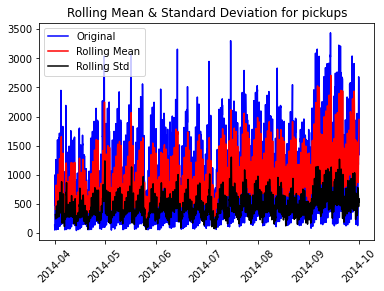

Results of Dickey-Fuller Test:
Test Statistic                   -4.906253
p-value                           0.000034
# Lags Used                      31.000000
Number of Observations Used    4359.000000
Critical Value (1%)              -3.431851
Critical Value (5%)              -2.862203
Critical Value (10%)             -2.567123
dtype: float64


In [ ]:
test_stationarity(df = h_dataset, ts = 'pickups')

Prueba de Dickey-Fuller
Hipótesis nula: Existe no estacionariedad en la serie.
Hipótesis alternativa: existe estacionariedad en la serie

Según el estadístico de Prueba t=-4.9 es menor que el Valor Crítico Vc=-3.4, entonces, la serie es estacionaria. Además, el valor p es inferior a 0,05. Con estos resultados Ho: se rechaza la hipótesis nula.

Por lo tanto, no tenemos problemas con:
Tendencia: la media no es constante a lo largo del tiempo
Estacionalidad: la varianza no es constante a lo largo del tiempo. No eliminará la tendencia y la estacionalidad.

In [ ]:
h_dataset.head(10)

,pickups,log,pickups_diff,log_diff
2014-04-01 00:00:00,138,4.927254,NaN,NaN
2014-04-01 01:00:00,66,4.189655,-72.0,-0.737599
2014-04-01 02:00:00,53,3.970292,-13.0,-0.219363
2014-04-01 03:00:00,93,4.532599,40.0,0.562308
2014-04-01 04:00:00,166,5.111988,73.0,0.579388
2014-04-01 05:00:00,333,5.808142,167.0,0.696155
2014-04-01 06:00:00,722,6.582025,389.0,0.773883
2014-04-01 07:00:00,1001,6.908755,279.0,0.326730
2014-04-01 08:00:00,780,6.659294,-221.0,-0.249461
2014-04-01 09:00:00,532,6.276643,-248.0,-0.382650


In [ ]:
X = h_dataset
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
print(train.shape,test.shape)

(2898, 4) (1493, 4)


ARIMA = Media Móvil Integrada Auto-Regresiva. Suposiciones. La serie temporal es estacionaria. Depende de:

Número de términos AR (Auto-Regresivos) (p).
Número de términos I (Integrados o Diferenciales) (d).
Número de términos MA (Moving Average) (q).
Con las parcelas ACF y PACF se pueden determinar p, d y q.

In [ ]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (9, 3))

  #Plot ACF:

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

  plt.tight_layout()
  plt.show()
  plt.close()

  return

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


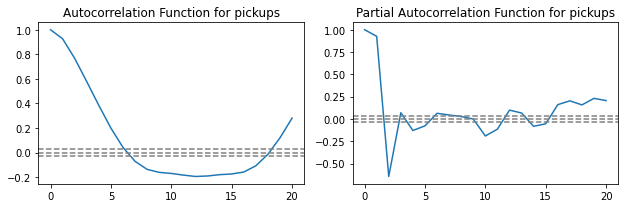

In [ ]:
# Definir ACF and PACF
lag_acf = acf(np.array(X['pickups']), nlags = 20)
lag_pacf = pacf(np.array(X['pickups']), nlags = 20)
plot_acf_pacf(df = X, ts = 'pickups')

Función de Autocorrelación (ACF). Correlación entre la serie temporal con una versión retrasada de sí misma (p. ej., correlación de Y(t) con Y(t-1)).

Función de Autocorrelación Parcial (PACF). Correlación adicional explicada por cada término rezagado sucesivo.

p: valor de retraso donde el gráfico PACF cruza el intervalo de confianza superior por primera vez. q: valor de retraso donde el gráfico ACF cruza el intervalo de confianza superior por primera vez.

In [ ]:
def run_arima_model(df, ts, p, d, q):

  # fit ARIMA model on time series
  model = ARIMA(df[ts], order=(p, d, q))
  results_ = model.fit()

  # get lengths correct to calculate RSS
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]

  # calculate root mean square error (RMSE) and residual sum of squares (RSS)
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))

  # plot fit
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))

  plt.show()
  plt.close()

  return results_

# Note: I do the differencing in the transformation of the data 'ts_log_diff'

# Nota: hago la diferenciación en la transformación de los datos 'ts_log_diff'




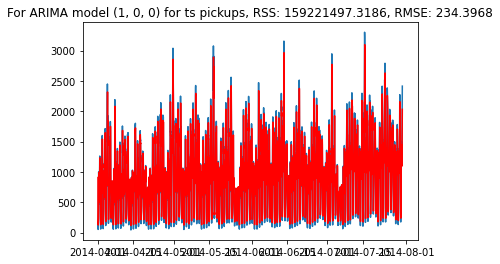

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


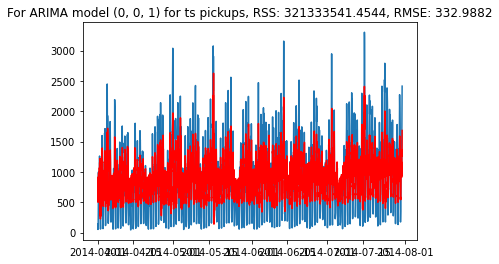

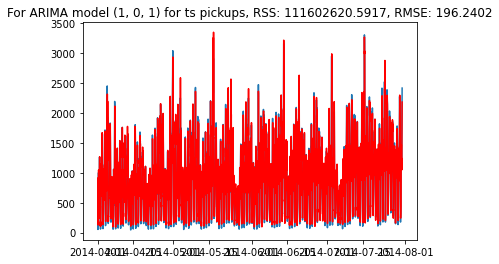

In [ ]:
# AR model with 1st order differencing - ARIMA (1,0,0)
model_MA1 = run_arima_model(df = train,
                           ts = 'pickups',
                           p = 1,
                           d = 0,
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA2 = run_arima_model(df = train,
                           ts = 'pickups',
                           p = 0,
                           d = 0,
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (1,0,1)
model_MA3 = run_arima_model(df = train,
                           ts = 'pickups',
                           p = 1,
                           d = 0,
                           q = 1)

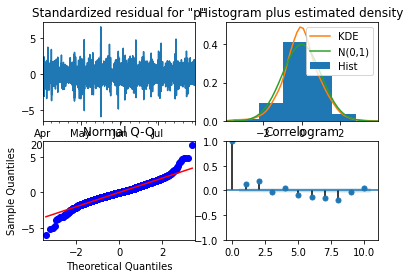

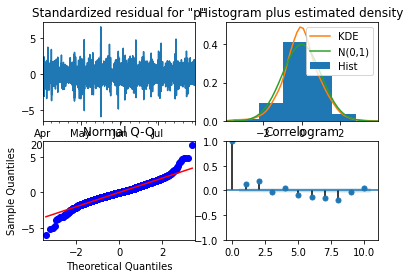

In [ ]:
model_MA3.plot_diagnostics()

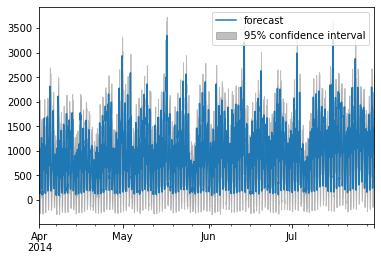

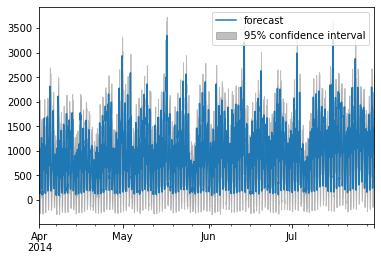

In [ ]:
plot_predict(model_MA3)

In [ ]:
y_true = test['pickups']
y_true

2014-07-30 18:00:00    2274
2014-07-30 19:00:00    2080
2014-07-30 20:00:00    2183
2014-07-30 21:00:00    2037
2014-07-30 22:00:00    1591
                       ... 
2014-09-30 18:00:00    2625
2014-09-30 19:00:00    2404
2014-09-30 20:00:00    2246
2014-09-30 21:00:00    1961
2014-09-30 22:00:00    1347
Freq: H, Name: pickups, Length: 1493, dtype: int64

In [ ]:
y_pred = pd.Series(model_MA3.forecast(1493)[0], index=test.index)